### Carlifonia Housing Dataset Description

The California Housing dataset contains 20,640 instances, each representing a block group in California. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data, typically consisting of a few city blocks.

### Features

The dataset includes the following features:

1. **MedInc**: Median income in block group
2. **HouseAge**: Median age of houses in block group
3. **AveRooms**: Average number of rooms per household
4. **AveBedrms**: Average number of bedrooms per household
5. **Population**: Block group population
6. **AveOccup**: Average number of household members
7. **Latitude**: Block group latitude
8. **Longitude**: Block group longitude


### Objective

The objective when using this dataset in a deep learning context is to predict the house value based on the other features.







In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing(as_frame=True)  # Get as a DataFrame
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target # Add the target variable to the DataFrame


In [ ]:
print(df.shape)


(20640, 9)


In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
print(housing.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [ ]:
print(df.describe())


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

Target Variable: MedHouseVal is the target variable, the one we are trying to predict. The entire purpose of the analysis and modeling is to understand and estimate this variable based on other features.


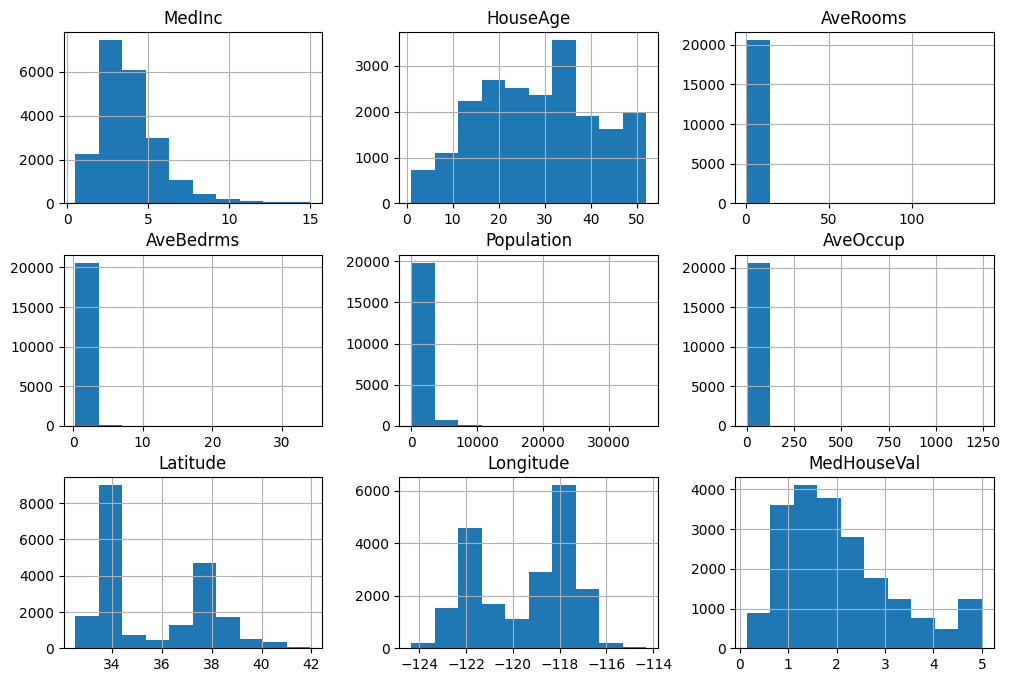

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12,8))
plt.show()


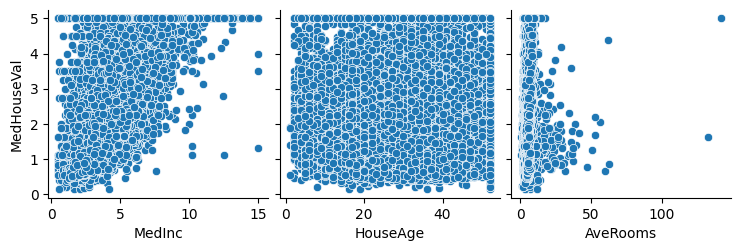

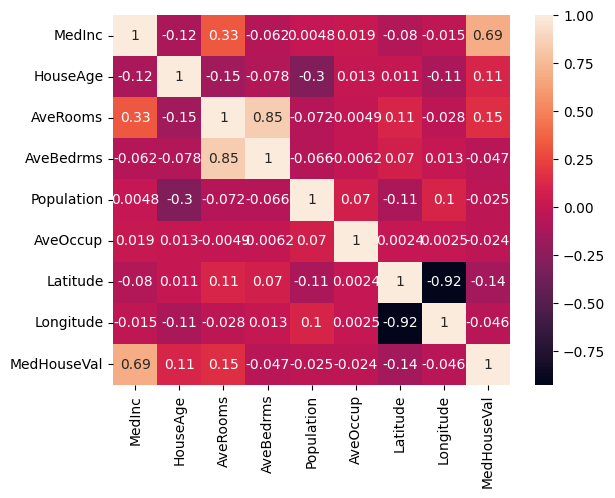

In [ ]:
sns.pairplot(df, x_vars=["MedInc", "HouseAge", "AveRooms"], y_vars="MedHouseVal")
plt.show()

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you've already loaded the dataset as `df`
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for ANNs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')


 Train the Model:


In [ ]:
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
413/413 [==============================] - 2s 3ms/step - loss: 0.7976 - val_loss: 0.4598
Epoch 2/50
413/413 [==============================] - 1s 2ms/step - loss: 0.4136 - val_loss: 0.4098
Epoch 3/50
413/413 [==============================] - 1s 2ms/step - loss: 0.3696 - val_loss: 0.3948
Epoch 4/50
413/413 [==============================] - 1s 2ms/step - loss: 0.3576 - val_loss: 0.3861
Epoch 5/50
413/413 [==============================] - 1s 2ms/step - loss: 0.3754 - val_loss: 0.3707
Epoch 6/50
413/413 [==============================] - 1s 2ms/step - loss: 0.3264 - val_loss: 0.3485
Epoch 7/50
413/413 [==============================] - 1s 3ms/step - loss: 0.3208 - val_loss: 0.3532
Epoch 8/50
413/413 [==============================] - 1s 3ms/step - loss: 0.3111 - val_loss: 0.3345
Epoch 9/50
413/413 [==============================] - 2s 4ms/step - loss: 0.3075 - val_loss: 0.3344
Epoch 10/50
413/413 [==============================] - 1s 2ms/step - loss: 0.3033 - val_loss: 0.3281

Epoch 35/50
413/413 [==============================] - 1s 3ms/step - loss: 0.2574 - val_loss: 0.2922
Epoch 36/50

The best model is typically the one with the lowest validation loss. In this case, it appears to be around epoch 48, where the val_loss is 0.2882.

In [ ]:
mse_test = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Mean Squared Error on Test Set:", mse_test)


Mean Squared Error on Test Set: 0.27339455485343933


In [ ]:
# Evaluate the ANN
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test Loss (MSE): {loss:.2f}')


Test Loss (MSE): 0.27


KeyError: 'mean_absolute_error'

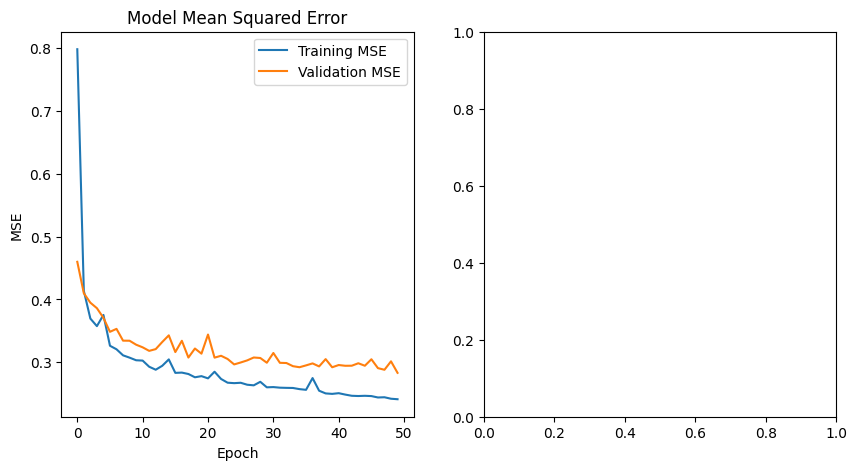

In [ ]:
# ... (Your code for data preparation, model building, and training) ...
import matplotlib.pyplot as plt

# Plot Training and Validation MSE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot Training and Validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()


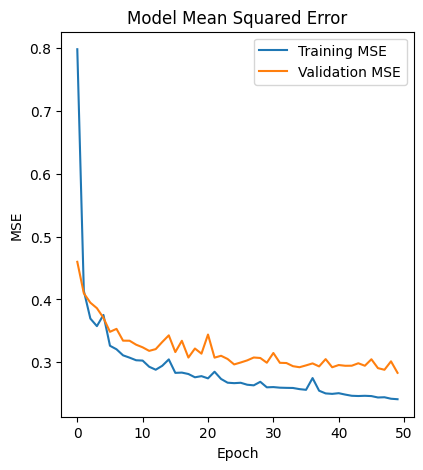

In [ ]:
# ... (Your code for data preparation, model building, and training) ...
import matplotlib.pyplot as plt

# Assuming 'mse' was used as the loss function during compilation
# Plot Training and Validation MSE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()